# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Oluwaseyi Whyte Akinlolu</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("winequality.csv")
data.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric_acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097  

In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
print("Rows, columns:" + str(data.shape))

info=data.info()
print(info)

Rows, columns:(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric_acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#check for missing values
print(data.isna().sum())
print("None of the values is missing")

fixed acidity           0
volatile acidity        0
citric_acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
None of the values is missing


# Exploratory Data Analysis

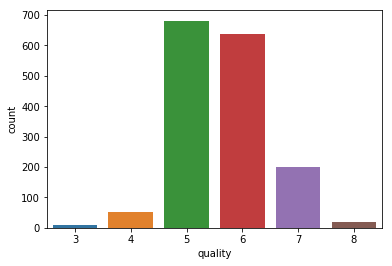

In [6]:
# Our label Distribution (countplot)
sns.countplot(x="quality", data=data)
plt.show()

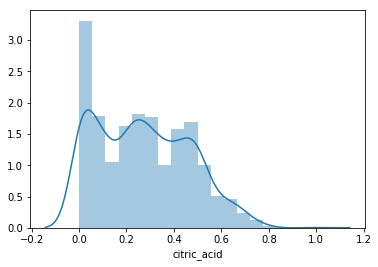

In [7]:
# Example EDA (distplot)
sns.distplot(data.citric_acid);
plt.show()

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [8]:
duplicates=data.duplicated()
print(sum(duplicates))

240


In [9]:
# I need to to add one more feature so i can define a bottle of wine as "good quality" if it had a 
# quality score of 7 or higher, and if it had a quality score of less than 7, it is tag "bad quality

data["goodquality"] = [1 if x >= 7 else 0 for x in data["quality"]]

X = data.drop(["quality", "goodquality"], axis = 1)
y= data["goodquality"]

In [10]:
#See proportion of Good vs Bad wines
proportion= data["goodquality"].value_counts()
print(proportion)
#Based on the result below, it seemed like the numbers are fair enough. resampling may 
#be required if the data was extremely imbalance, but i assumed that it was okay for this purpose

0    1382
1     217
Name: goodquality, dtype: int64


In [11]:
#Normalize feature variaables

from sklearn.preprocessing import StandardScaler
X_features = X
X= StandardScaler().fit_transform(X)

In [12]:
#Splitting the data into training and test set so i could cross-validate my models and dtermin their effectivenes
#70% for training, 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=0)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [13]:
#Model 1: Decision trees
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.78      0.88      0.82         8

   micro avg       0.96      0.96      0.96        70
   macro avg       0.88      0.92      0.90        70
weighted avg       0.96      0.96      0.96        70



In [14]:
model1 = DecisionTreeClassifier(max_depth=4, random_state=0)
model1.fit(X_train,y_train)
print("Accuracy of train:",model1.score(X_train,y_train))
print("Accuracy of test:",model1.score(X_test,y_test))

Accuracy of train: 0.9136690647482014
Accuracy of test: 0.9


In [15]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1 Score:",f1_score(y_test,y_pred1))

Accuracy: 0.9571428571428572
Precision: 0.7777777777777778
Recall: 0.875
F1 Score: 0.823529411764706


In [16]:
#Model 2:  Random Forest
from sklearn.ensemble import RandomForestClassifier

model2= RandomForestClassifier(random_state = 0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.83      0.62      0.71         8

   micro avg       0.94      0.94      0.94        70
   macro avg       0.89      0.80      0.84        70
weighted avg       0.94      0.94      0.94        70



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train,y_train)
print("Accuracy of train:",model2.score(X_train,y_train))
print("Accuracy of test:",model2.score(X_test,y_test))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of train: 0.9914977109221713
Accuracy of test: 0.9428571428571428


In [18]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model2.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Precision:",precision_score(y_test,y_pred2))
print("Recall:",recall_score(y_test,y_pred2))
print("F1 Score:",f1_score(y_test,y_pred2))

Accuracy: 0.9428571428571428
Precision: 0.8333333333333334
Recall: 0.625
F1 Score: 0.7142857142857143


In [19]:
#Model 3: Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model3= GradientBoostingClassifier(random_state=0)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        62
           1       0.60      0.38      0.46         8

   micro avg       0.90      0.90      0.90        70
   macro avg       0.76      0.67      0.70        70
weighted avg       0.89      0.90      0.89        70



In [20]:
model3 = GradientBoostingClassifier(random_state=0)
model3.fit(X_train,y_train)
print("Accuracy of train:",model3.score(X_train,y_train))
print("Accuracy of test:",model3.score(X_test,y_test))

Accuracy of train: 0.9627207325049052
Accuracy of test: 0.9


In [21]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model3.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred3))
print("Precision:",precision_score(y_test,y_pred3))
print("Recall:",recall_score(y_test,y_pred3))
print("F1 Score:",f1_score(y_test,y_pred3))

Accuracy: 0.9
Precision: 0.6
Recall: 0.375
F1 Score: 0.4615384615384615


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

By comparing the three models, the random forest seems to yield the highest level of accuracy. it also has a better f1-score for predicting good qaulity wines(1), I'm concluding that the Random forest is the winner of the three models

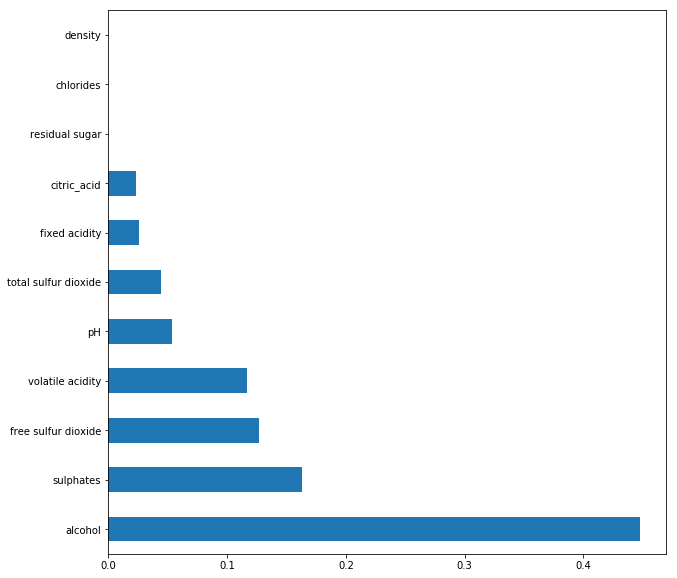

In [22]:
#Model 1: Decision trees
add_importances = pd.Series(model1.feature_importances_, index= X_features.columns)
add_importances.nlargest(25).plot(kind= "barh", figsize=(10,10))

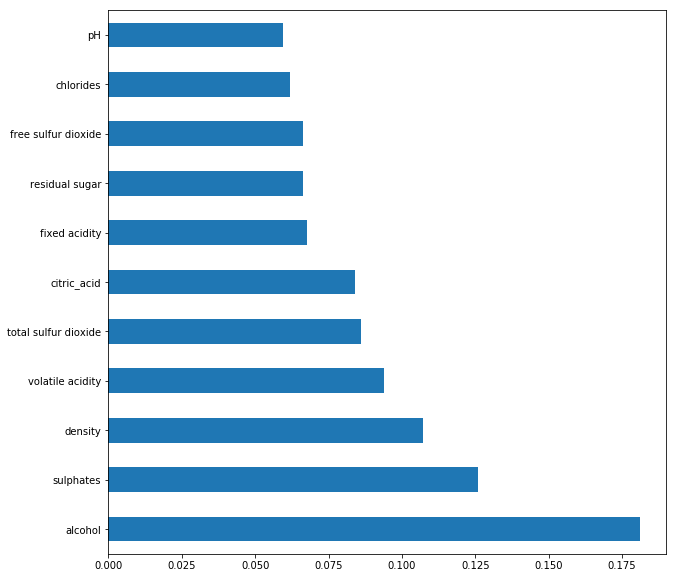

In [23]:
#Model 2:  Random Forest
add_importances1 = pd.Series(model2.feature_importances_, index= X_features.columns)

add_importances1.nlargest(25).plot(kind= "barh", figsize=(10,10))

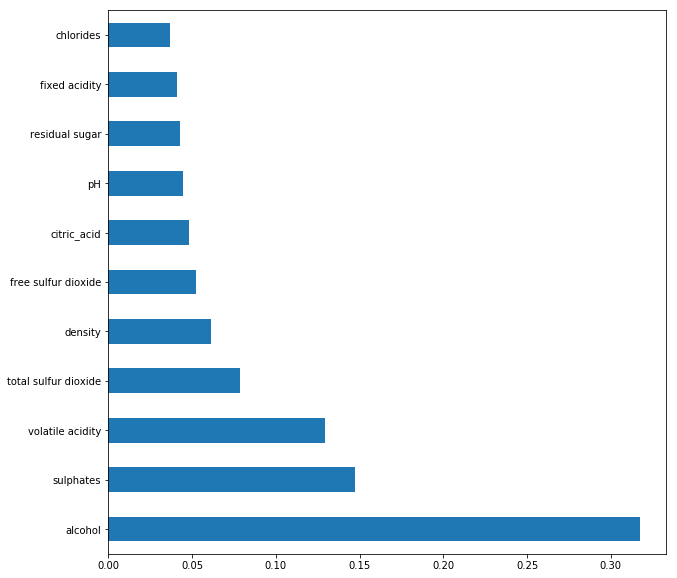

In [24]:
#Model 3:  Gradient Boosting
add_importances2 = pd.Series(model3.feature_importances_, index= X_features.columns)

add_importances2.nlargest(25).plot(kind= "barh", figsize=(10,10))

# Comparing the models

In [25]:
#Filtering data for only good quality
df_temp= data[data["goodquality"]==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric_acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [26]:
#Filtering data for only bad quality
df_temp2 = data[data["goodquality"]==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric_acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


- By looking into the details, we can see that good quality wines have higher levels of alcohol on average
- Have higher volatile acidity on average
- have higher levels of sulphates on average
- Have higher levels of residual sugar on average